# My Project - App Exploration

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

wine_red_white = pd.read_csv("wine-quality-white-and-red.csv")
wine_red_white

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
missingness = wine_red_white.isna().any().any()
print(missingness)  # True if any missing values, otherwise False

False


# Variable Meanings 

Fixed Acidity - the sum of a wine's natural acids that remain in the wine after its a liquid has been boiled. 
- a low concentration = makes the wine taste watery and insipid
- a high concentration = makes the wine taste hard, sharp and astringent
- the higher the ph of wine, the lower the acidity, wine makers calculate the total acidity (2.9-3.9 on ph scale).
  
Volatile Acidity - measure of gaseous acid in wine, contributes to wine taste and smell. Primaary VA is acetic acid (smells like vinegar)
- should not exceed 0.98gallons/liter for reds
- "                " 0.88g/l for whites and rosés
- if the limit is high or exceed the finish taste of the wine will have a "slightly sharp tingle" on the nose, and a fiery finish due to the aggressive acidity.

Citric Acid - Added to the wine after fermentation, can be converted to acetic acid and increase the acidic taste of the wine like vinegar.  it can bring out a fresher, fruity citrus note in wine

Residual Sugar - the amount of natural sugars left over from the grapes after the alcohol fermentation process. Measured in grams per liter. 
https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/ 
- Csn be measured in carbohydrates per serving. 

Chlorides - Contributes to the saltiness of wine. High levels make a wine taste salty and less "marketable". generally less tahn 60mg/L but varies based on geographic location and origin of wine.

free sulfur dioxide - known for antioxidant and antimicrobial properties. Measured in parts per million. 

total sulfur dioxide - the combindation of sulfur dioxide of free and bound SO2. Dry reds have around 50-75ppm. Sulfur dioxide preserves the wines freshness and fruit taste. Stops other yeast from growing.

Density - Dry wines have a density around 0.9g/cm^3 and sweet wines (low alcohol content) have density around 1.03g/cm^3 

PH - Ranges from 2.8 to 4.2, white wines are usually more acidic than reds. Whites between 3.0-3.5, and Red 3.3-3.8 PH. Lower ph improves the wines chemical and  biological stabilituy. 

Sulphates - used to stop fermentation at a specific point in wine. protects against oxidation that can affect color and taste.

Alcohol - The alcohol in wine is ethanol, which is produced when yeast ferments the sugars in fruit. The amount of alcohol in wine is measured by alcohol by volume (ABV). Colder climates make it harder for grapes to ripen resulting in lower alcohol volumes. 
- Moscato d'Asti: 5.5% ABV, a lightly sparkling sweet white wine from Italy
- Brachetto d'Acqui: 6.5% ABV, a lightly sparkling sweet red wine from Italy
- Kabinett Riesling: 8% ABV, a light sweet German Riesling
- Spätlese Riesling: 8.5% ABV, a rich sweet German Riesling
- Alsace Blanc: 9–10% ABV, a French wine
- Muscadet: 9.5% ABV, a French wine

Quality - ranked from 0 to 10. Where 0 is very bad and 10 is excellent.


# Wine Organization
By Type:

- Red Wine: Made from dark-colored grape varieties.
- White Wine: Made from green or yellowish grapes, or red grapes without the skins.
- Rosé Wine: Made from red grapes with limited skin contact, resulting in a pink color.
- Sparkling Wine: Contains carbonation, usually from secondary fermentation (e.g., Champagne).
- Dessert Wine: Sweet wines often served with or as dessert (e.g., Port, Sauternes).

By Sweetness:

- Dry: Minimal residual sugar.
- Off-Dry: Slightly sweet, with some residual sugar.
- Sweet: Noticeable sweetness from residual sugar.

By Acidity:

- High Acidity: Crisp and refreshing, often found in white wines.
- Medium Acidity: Balanced flavor, found in many reds and whites.
- Low Acidity: Smooth and round, often found in full-bodied red wines.

# Creating Initial Subplots of Data

In [ ]:
# Create individual masks
mask_fixed_acidity = (wine_red_white["fixed acidity"] >= 5.0) & (wine_red_white["fixed acidity"] <= 10)
mask_volatile_acidity = (wine_red_white["volatile acidity"] >= 0.5) & (wine_red_white["volatile acidity"] < 1.5)
mask_citric_acid = (wine_red_white["citric acid"] >= 0.5) & (wine_red_white["citric acid"] <= 1.0)
#mask_residual_sugar = (wine_red_white["residual sugar"] >= 45) & (wine_red_white["residual sugar"] <= 300)
mask_chlorides = (wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"] < 0.1)
mask_free_sulfur_dioxide = (wine_red_white["free sulfur dioxide"] >= 30) & (wine_red_white["free sulfur dioxide"] <= 150)
mask_total_sulfur_dioxide = (wine_red_white["total sulfur dioxide"] >= 100) & (wine_red_white["total sulfur dioxide"] <= 300)
#mask_density = (wine_red_white["density"] >= 1.05) & (wine_red_white["density"] <= 1.15)
mask_pH = (wine_red_white["pH"] >= 3.00) & (wine_red_white["pH"] <= 4.00)
mask_sulphates = (wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"] <= 0.5)
#mask_alcohol = (wine_red_white["alcohol"] >= 15.0) & (wine_red_white["alcohol"] <= 20.0)

# Combine all masks into one
combined_mask = (mask_fixed_acidity &
                 mask_volatile_acidity &
                 mask_citric_acid &
  #               mask_residual_sugar &
                 mask_chlorides &
                 mask_free_sulfur_dioxide &
                 mask_total_sulfur_dioxide &
  #               mask_density &
                 mask_pH &
                 mask_sulphates)
   #              mask_alcohol)

# Create the final DataFrame for dessert wines
dessert_wines_df = wine_red_white[combined_mask]

# Display the result
dessert_wines_df


In [ ]:
# Create individual masks for sweet wines
mask_fixed_acidity = (wine_red_white["fixed acidity"] >= 5.0) & (wine_red_white["fixed acidity"] <= 10)
mask_volatile_acidity = (wine_red_white["volatile acidity"] >= 0.3) & (wine_red_white["volatile acidity"] < 1.2)
mask_citric_acid = (wine_red_white["citric acid"] >= 0.1) & (wine_red_white["citric acid"] <= 1.0)
mask_residual_sugar = (wine_red_white["residual sugar"] >= .030) & (wine_red_white["residual sugar"] <= .150)
mask_chlorides = (wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"] < 0.1)
mask_free_sulfur_dioxide = (wine_red_white["free sulfur dioxide"] >= 20) & (wine_red_white["free sulfur dioxide"] <= 70)
mask_total_sulfur_dioxide = (wine_red_white["total sulfur dioxide"] >= 100) & (wine_red_white["total sulfur dioxide"] <= 300)
#mask_density = (wine_red_white["density"] >= 1.05) & (wine_red_white["density"] <= 1.15)
mask_pH = (wine_red_white["pH"] >= 3.00) & (wine_red_white["pH"] <= 3.50)
mask_sulphates = (wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"] <= 0.5)
mask_alcohol = (wine_red_white["alcohol"] >= 12.0) & (wine_red_white["alcohol"] <= 20.0)

# Combine all masks into one
combined_mask = (mask_fixed_acidity &
                 mask_volatile_acidity &
                 mask_citric_acid &
               #  mask_residual_sugar &
                 mask_chlorides &
                 mask_free_sulfur_dioxide &
                 mask_total_sulfur_dioxide &
                # mask_density &
                 mask_pH &
                 mask_sulphates &
                 mask_alcohol)

# Create the final DataFrame for sweet wines
sweet_wines_df = wine_red_white[combined_mask]

# Display the result
sweet_wines_df

In [ ]:
# Create individual masks for dry wines
mask_fixed_acidity = (wine_red_white["fixed acidity"] >= 4.0) & (wine_red_white["fixed acidity"] <= 8)
mask_volatile_acidity = (wine_red_white["volatile acidity"] >= 0.3) & (wine_red_white["volatile acidity"] <= 0.7)
mask_citric_acid = (wine_red_white["citric acid"] >= 0.1) & (wine_red_white["citric acid"] <= 0.5)
mask_residual_sugar = (wine_red_white["residual sugar"] >= 0.1) & (wine_red_white["residual sugar"] <= 5)
mask_chlorides = (wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"] < 0.1)
mask_free_sulfur_dioxide = (wine_red_white["free sulfur dioxide"] >= 20) & (wine_red_white["free sulfur dioxide"] <= 50)
mask_total_sulfur_dioxide = (wine_red_white["total sulfur dioxide"] >= 70) & (wine_red_white["total sulfur dioxide"] <= 200)
mask_density = (wine_red_white["density"] >= 0.99) & (wine_red_white["density"] <= 1.05)
mask_pH = (wine_red_white["pH"] >= 3.2) & (wine_red_white["pH"] <= 3.6)
mask_sulphates = (wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"] <= 0.5)
mask_alcohol = (wine_red_white["alcohol"] >= 11.0) & (wine_red_white["alcohol"] <= 14.0)

# Combine all masks into one
combined_mask = (mask_fixed_acidity &
                 mask_volatile_acidity &
                 mask_citric_acid &
                 mask_residual_sugar &
                 mask_chlorides &
                 mask_free_sulfur_dioxide &
                 mask_total_sulfur_dioxide &
                 mask_density &
                 mask_pH &
                 mask_sulphates &
                 mask_alcohol)

# Create the final DataFrame for dry wines
dry_wines_df = wine_red_white[combined_mask]

# Display the result
dry_wines_df

In [ ]:
# Create individual masks for off-dry wines
mask_fixed_acidity = (wine_red_white["fixed acidity"] >= 4.0) & (wine_red_white["fixed acidity"] <= 8)
mask_volatile_acidity = (wine_red_white["volatile acidity"] >= 0.3) & (wine_red_white["volatile acidity"] <= 0.8)
mask_citric_acid = (wine_red_white["citric acid"] >= 0.1) & (wine_red_white["citric acid"] <= 0.5)
mask_residual_sugar = (wine_red_white["residual sugar"] >= 5) & (wine_red_white["residual sugar"] <= 30)
mask_chlorides = (wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"] < 0.1)
mask_free_sulfur_dioxide = (wine_red_white["free sulfur dioxide"] >= 20) & (wine_red_white["free sulfur dioxide"] <= 60)
mask_total_sulfur_dioxide = (wine_red_white["total sulfur dioxide"] >= 70) & (wine_red_white["total sulfur dioxide"] <= 250)
mask_density = (wine_red_white["density"] >= 1.00) & (wine_red_white["density"] <= 1.07)
mask_pH = (wine_red_white["pH"] >= 3.2) & (wine_red_white["pH"] <= 3.5)
mask_sulphates = (wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"] <= 0.5)
mask_alcohol = (wine_red_white["alcohol"] >= 11.0) & (wine_red_white["alcohol"] <= 14.5)

# Combine all masks into one
combined_mask = (mask_fixed_acidity &
                 mask_volatile_acidity &
                 mask_citric_acid &
                # mask_residual_sugar &
                 mask_chlorides &
                 mask_free_sulfur_dioxide &
                 mask_total_sulfur_dioxide &
                # mask_density &
                 mask_pH &
                 mask_sulphates &
                 mask_alcohol)

# Create the final DataFrame for off-dry wines
off_dry_wines_df = wine_red_white[combined_mask]

# Display the result
off_dry_wines_df

In [4]:
red = wine_red_white[(wine_red_white["type"] == "red")]
len(red)

1599

In [5]:
white = wine_red_white[(wine_red_white["type"] == "white")]
len(white)

4898

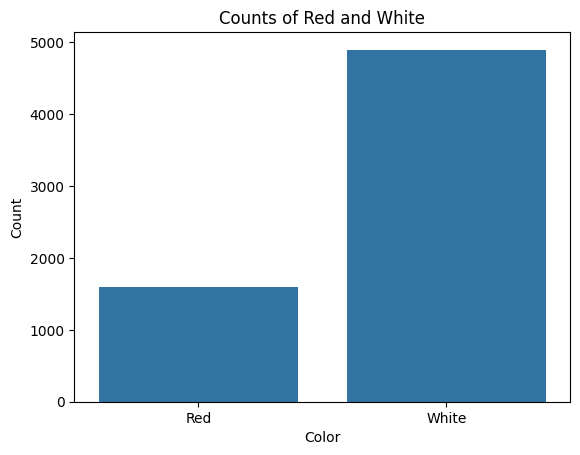

In [6]:
# Example data: Assuming 'red' and 'white' are your categories
red_count = (len(red))  # Example count for red
white_count = len(white) # Example count for white

# Create a DataFrame with the counts
df = pd.DataFrame({
    'Color': ['Red', 'White'],
    'Count': [red_count, white_count]
})

# Create box plot (Note: Box plots are usually for distributions, but here we can use a bar plot for clarity)
sns.barplot(x='Color', y='Count', data=df)
plt.title('Counts of Red and White')
plt.ylabel('Count')
plt.xlabel('Color')
plt.show()

# Balancing My Dataset - Undersampling the majority class

In [39]:
import pandas as pd

# Load the dataset
wine_red_white = pd.read_csv("wine-quality-white-and-red.csv")

# Count the number of samples in the 'Red' class
red_count = wine_red_white[wine_red_white['type'] == 'red'].shape[0]

# Undersample the 'White' class, retaining all columns
white_undersampled = wine_red_white[wine_red_white['type'] == 'white'].sample(n=red_count, random_state=42)

# Combine the undersampled 'White' class with the 'Red' class, retaining all columns
balanced_df = pd.concat([wine_red_white[wine_red_white['type'] == 'red'], white_undersampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
# wine_red_white = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the value counts of the 'type' column in the balanced dataset
print(balanced_df['type'].value_counts())
balanced_df
# Optionally, save the balanced dataset to a new CSV file
# balanced_df.to_csv("balanced_wine_dataset.csv", index=False)


type
white    1599
red      1599
Name: count, dtype: int64


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.9,0.190,0.32,7.9,0.042,30.0,130.0,0.99456,3.40,0.39,10.5,6
1,red,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
2,red,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6
3,red,10.2,0.410,0.43,2.2,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,5
4,red,6.8,0.590,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,red,9.4,0.400,0.47,2.5,0.087,6.0,20.0,0.99772,3.15,0.50,10.5,5
3194,red,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,6
3195,red,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
3196,red,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5


# Creating subplots with balanced data

### Dessert Wines 

In [41]:
# Dessert 
# dessertWines = {'fixed acdity': wine_red_white[(wine_red_white["fixed acidity"] >= 5.0) & (wine_red_white["fixed acidity"]<=10)], 
#                 'volatile acidity': wine_red_white[(wine_red_white["volatile acidity"] >= 0.5) & (wine_red_white["volatile acidity"]< 1.5)], 
#                'citric acid': wine_red_white[(wine_red_white["citric acid"] >= 0.5) & (wine_red_white["citric acid"]<= 1.0)], 
#                'residual sugar': wine_red_white[(wine_red_white["residual sugar"] >= 45) & (wine_red_white["residual sugar"]<= 300)],
#                'chlorides': wine_red_white[(wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"]< 0.1)], 
#                'free sulfur dioxide': wine_red_white[(wine_red_white["free sulfur dioxide"] >= 30) & (wine_red_white["free sulfur dioxide"]<= 150)],
#                'total sulfur dioxide': wine_red_white[(wine_red_white["total sulfur dioxide"] >= 100) & (wine_red_white["total sulfur dioxide"]<= 300)],
#                'density': wine_red_white[(wine_red_white["density"] >= 1.05) & (wine_red_white["density"]<= 1.15)],
#                'pH': wine_red_white[(wine_red_white["pH"] >= 3.00) & (wine_red_white["pH"]<= 4.00)],
#                'sulphates': wine_red_white[(wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"]<= 0.5)],
#                'alcohol': wine_red_white[(wine_red_white["alcohol"] >= 15.0) & (wine_red_white["alcohol"]<= 20.0)]}
# dessertWines 


In [56]:
# Create individual masks
mask_fixed_acidity = (wine_red_white["fixed acidity"] >= 5.0) & (wine_red_white["fixed acidity"] <= 10)
mask_volatile_acidity = (wine_red_white["volatile acidity"] >= 0.5) & (wine_red_white["volatile acidity"] < 1.5)
mask_citric_acid = (wine_red_white["citric acid"] >= 0.5) & (wine_red_white["citric acid"] <= 1.0)
#mask_residual_sugar = (wine_red_white["residual sugar"] >= 45) & (wine_red_white["residual sugar"] <= 300)
mask_chlorides = (wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"] < 0.1)
mask_free_sulfur_dioxide = (wine_red_white["free sulfur dioxide"] >= 30) & (wine_red_white["free sulfur dioxide"] <= 150)
mask_total_sulfur_dioxide = (wine_red_white["total sulfur dioxide"] >= 100) & (wine_red_white["total sulfur dioxide"] <= 300)
#mask_density = (wine_red_white["density"] >= 1.05) & (wine_red_white["density"] <= 1.15)
mask_pH = (wine_red_white["pH"] >= 3.00) & (wine_red_white["pH"] <= 4.00)
mask_sulphates = (wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"] <= 0.5)
#mask_alcohol = (wine_red_white["alcohol"] >= 15.0) & (wine_red_white["alcohol"] <= 20.0)

# Combine all masks into one
combined_mask = (mask_fixed_acidity &
                 mask_volatile_acidity &
                 mask_citric_acid &
  #               mask_residual_sugar &
                 mask_chlorides &
                 mask_free_sulfur_dioxide &
                 mask_total_sulfur_dioxide &
  #               mask_density &
                 mask_pH &
                 mask_sulphates)
   #              mask_alcohol)

# Create the final DataFrame for dessert wines
dessert_wines_df = wine_red_white[combined_mask]

# Display the result
dessert_wines_df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
766,white,6.7,0.500,0.63,13.4,0.078,81.0,238.0,0.99880,3.08,0.44,9.2,5
2394,white,6.3,0.695,0.55,12.9,0.056,58.0,252.0,0.99806,3.29,0.49,8.7,5
3097,white,6.6,0.780,0.50,1.5,0.045,30.0,133.0,0.99104,3.25,0.48,11.7,5
3165,white,6.1,0.680,0.52,1.4,0.037,32.0,123.0,0.99022,3.24,0.45,12.0,6


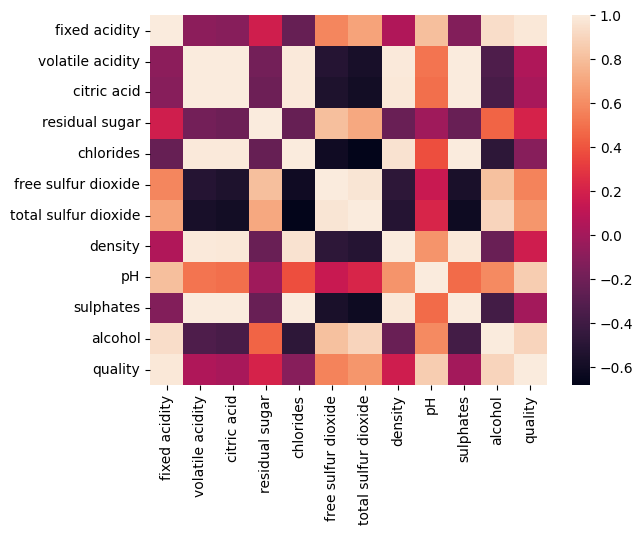

In [57]:
dessertWines1 = dessert_wines_df.describe().corr()
dessertWines1

plt.figure
sns.heatmap(dessertWines1)
plt.show()

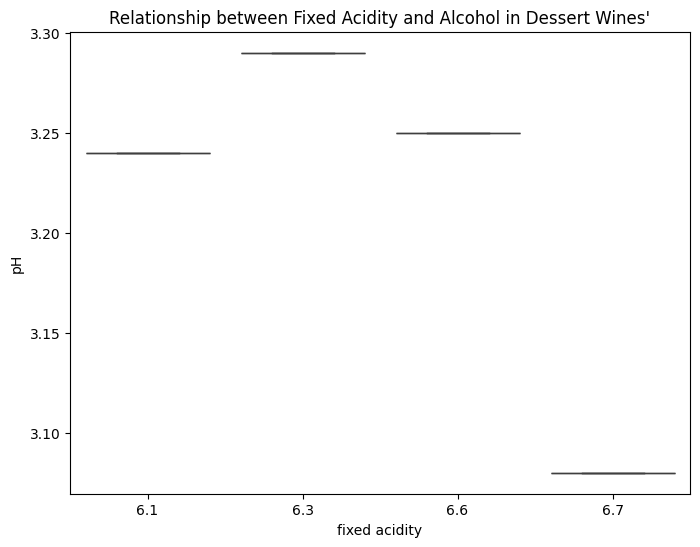

In [60]:
# Visualize the relationship
plt.figure(figsize=(8, 6)) # setting figure size
sns.boxplot(x='fixed acidity', y='alcohol', data=dessert_wines_df) # plotting a boxplot with x representing seoal missingness and y representing petal length
plt.title("Relationship between Fixed Acidity and Alcohol in Dessert Wines'") # adding title
plt.show() # displaying figure 

### Sweet wines

In [46]:
# # Sweet
# sweetWines = {'fixed acdity': wine_red_white[(wine_red_white["fixed acidity"] >= 5.0) & (wine_red_white["fixed acidity"]<=10)], 
#                 'volatile acidity': wine_red_white[(wine_red_white["volatile acidity"] >= 0.3) & (wine_red_white["volatile acidity"]< 1.2)], 
#                'citric acid': wine_red_white[(wine_red_white["citric acid"] >= 0.1) & (wine_red_white["citric acid"]<= 1.0)], 
#                'residual sugar': wine_red_white[(wine_red_white["residual sugar"] >= 30) & (wine_red_white["residual sugar"]<= 150)],
#                'chlorides': wine_red_white[(wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"]< 0.1)], 
#                'free sulfur dioxide': wine_red_white[(wine_red_white["free sulfur dioxide"] >= 20) & (wine_red_white["free sulfur dioxide"]<= 70)],
#                'total sulfur dioxide': wine_red_white[(wine_red_white["total sulfur dioxide"] >= 100) & (wine_red_white["total sulfur dioxide"]<= 300)],
#                'density': wine_red_white[(wine_red_white["density"] >= 1.05) & (wine_red_white["density"]<= 1.15)],
#                'pH': wine_red_white[(wine_red_white["pH"] >= 3.00) & (wine_red_white["pH"]<= 3.50)],
#                'sulphates': wine_red_white[(wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"]<= 0.5)],
#                'alcohol': wine_red_white[(wine_red_white["alcohol"] >= 12.0) & (wine_red_white["alcohol"]<= 20.0)]}
# sweetWines 


In [34]:
# Create individual masks for sweet wines
mask_fixed_acidity = (wine_red_white["fixed acidity"] >= 5.0) & (wine_red_white["fixed acidity"] <= 10)
mask_volatile_acidity = (wine_red_white["volatile acidity"] >= 0.3) & (wine_red_white["volatile acidity"] < 1.2)
mask_citric_acid = (wine_red_white["citric acid"] >= 0.1) & (wine_red_white["citric acid"] <= 1.0)
mask_residual_sugar = (wine_red_white["residual sugar"] >= .030) & (wine_red_white["residual sugar"] <= .150)
mask_chlorides = (wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"] < 0.1)
mask_free_sulfur_dioxide = (wine_red_white["free sulfur dioxide"] >= 20) & (wine_red_white["free sulfur dioxide"] <= 70)
mask_total_sulfur_dioxide = (wine_red_white["total sulfur dioxide"] >= 100) & (wine_red_white["total sulfur dioxide"] <= 300)
#mask_density = (wine_red_white["density"] >= 1.05) & (wine_red_white["density"] <= 1.15)
mask_pH = (wine_red_white["pH"] >= 3.00) & (wine_red_white["pH"] <= 3.50)
mask_sulphates = (wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"] <= 0.5)
mask_alcohol = (wine_red_white["alcohol"] >= 12.0) & (wine_red_white["alcohol"] <= 20.0)

# Combine all masks into one
combined_mask = (mask_fixed_acidity &
                 mask_volatile_acidity &
                 mask_citric_acid &
               #  mask_residual_sugar &
                 mask_chlorides &
                 mask_free_sulfur_dioxide &
                 mask_total_sulfur_dioxide &
                # mask_density &
                 mask_pH &
                 mask_sulphates &
                 mask_alcohol)

# Create the final DataFrame for sweet wines
sweet_wines_df = wine_red_white[combined_mask]

# Display the result
sweet_wines_df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
357,white,7.5,0.32,0.49,1.70,0.031,44.0,109.0,0.99060,3.07,0.46,12.500000,6
523,white,6.2,0.30,0.31,1.60,0.035,40.0,106.0,0.98914,3.26,0.39,12.900000,7
541,white,7.5,0.32,0.49,1.70,0.031,44.0,109.0,0.99060,3.07,0.46,12.500000,6
618,white,6.8,0.32,0.32,8.70,0.029,31.0,105.0,0.99146,3.00,0.34,12.300000,7
624,white,6.5,0.33,0.38,2.50,0.047,30.0,148.0,0.98964,3.17,0.43,12.700000,6
794,white,6.7,0.32,0.32,1.70,0.031,31.0,114.0,0.98946,3.12,0.35,12.500000,6
799,white,8.2,0.42,0.29,4.10,0.030,31.0,100.0,0.99110,3.00,0.32,12.800000,7
825,white,7.3,0.39,0.37,1.10,0.043,36.0,113.0,0.99100,3.39,0.48,12.700000,8
837,white,6.6,0.31,0.28,1.40,0.035,28.0,107.0,0.98836,3.00,0.40,13.200000,6
923,white,6.0,0.44,0.26,3.10,0.053,57.0,128.0,0.98982,3.22,0.39,12.700000,6


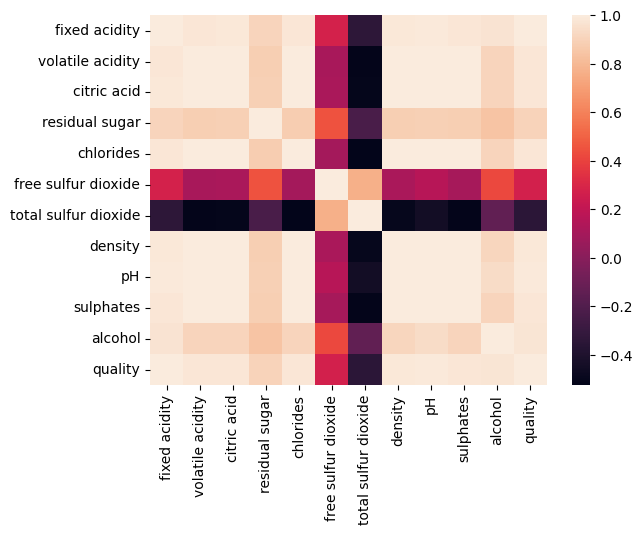

In [53]:
sweetWines1 = sweet_wines_df.describe().corr()
sweetWines1

plt.figure
sns.heatmap(sweetWines1)
plt.show()

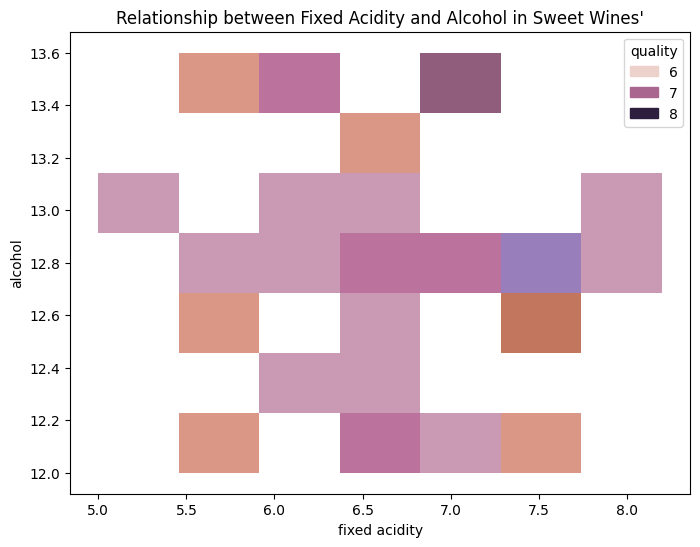

In [69]:
# Visualize the relationship
plt.figure(figsize=(8, 6)) # setting figure size
sns.histplot(x='fixed acidity', y='alcohol', hue = "quality", data=sweet_wines_df, multiple="stack") # plotting a boxplot with x representing seoal missingness and y representing petal length
plt.title("Relationship between Fixed Acidity and Alcohol in Sweet Wines'") # adding title
plt.show() # displaying figure 

### Dry Wines

In [45]:
# # Dry
# dryWines  = {'fixed acdity': wine_red_white[(wine_red_white["fixed acidity"] >= 4.0) & (wine_red_white["fixed acidity"]<=8)], 
#                 'volatile acidity': wine_red_white[(wine_red_white["volatile acidity"] >= 0.3) & (wine_red_white["volatile acidity"]<= 0.7)], 
#                'citric acid': wine_red_white[(wine_red_white["citric acid"] >= 0.1) & (wine_red_white["citric acid"]<= 0.5)], 
#                'residual sugar': wine_red_white[(wine_red_white["residual sugar"] >= 0.1) & (wine_red_white["residual sugar"]<= 5)],
#                'chlorides': wine_red_white[(wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"]< 0.1)], 
#                'free sulfur dioxide': wine_red_white[(wine_red_white["free sulfur dioxide"] >= 20) & (wine_red_white["free sulfur dioxide"]<= 50)],
#                'total sulfur dioxide': wine_red_white[(wine_red_white["total sulfur dioxide"] >= 70) & (wine_red_white["total sulfur dioxide"]<= 200)],
#                'density': wine_red_white[(wine_red_white["density"] >= .99) & (wine_red_white["density"]<= 1.05)],
#                'pH': wine_red_white[(wine_red_white["pH"] >= 3.2) & (wine_red_white["pH"]<= 3.6)],
#                'sulphates': wine_red_white[(wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"]<= 0.5)],
#                'alcohol': wine_red_white[(wine_red_white["alcohol"] >= 11.0) & (wine_red_white["alcohol"]<= 14.0)]}
# dryWines 


In [36]:
# Create individual masks for dry wines
mask_fixed_acidity = (wine_red_white["fixed acidity"] >= 4.0) & (wine_red_white["fixed acidity"] <= 8)
mask_volatile_acidity = (wine_red_white["volatile acidity"] >= 0.3) & (wine_red_white["volatile acidity"] <= 0.7)
mask_citric_acid = (wine_red_white["citric acid"] >= 0.1) & (wine_red_white["citric acid"] <= 0.5)
mask_residual_sugar = (wine_red_white["residual sugar"] >= 0.1) & (wine_red_white["residual sugar"] <= 5)
mask_chlorides = (wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"] < 0.1)
mask_free_sulfur_dioxide = (wine_red_white["free sulfur dioxide"] >= 20) & (wine_red_white["free sulfur dioxide"] <= 50)
mask_total_sulfur_dioxide = (wine_red_white["total sulfur dioxide"] >= 70) & (wine_red_white["total sulfur dioxide"] <= 200)
mask_density = (wine_red_white["density"] >= 0.99) & (wine_red_white["density"] <= 1.05)
mask_pH = (wine_red_white["pH"] >= 3.2) & (wine_red_white["pH"] <= 3.6)
mask_sulphates = (wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"] <= 0.5)
mask_alcohol = (wine_red_white["alcohol"] >= 11.0) & (wine_red_white["alcohol"] <= 14.0)

# Combine all masks into one
combined_mask = (mask_fixed_acidity &
                 mask_volatile_acidity &
                 mask_citric_acid &
                 mask_residual_sugar &
                 mask_chlorides &
                 mask_free_sulfur_dioxide &
                 mask_total_sulfur_dioxide &
                 mask_density &
                 mask_pH &
                 mask_sulphates &
                 mask_alcohol)

# Create the final DataFrame for dry wines
dry_wines_df = wine_red_white[combined_mask]

# Display the result
dry_wines_df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
26,white,6.2,0.39,0.24,4.80,0.037,45.0,138.0,0.99174,3.23,0.43,11.2,7
95,white,6.2,0.39,0.24,4.80,0.037,45.0,138.0,0.99174,3.23,0.43,11.2,7
825,white,7.3,0.39,0.37,1.10,0.043,36.0,113.0,0.99100,3.39,0.48,12.7,8
856,white,5.3,0.30,0.16,4.20,0.029,37.0,100.0,0.99050,3.30,0.36,11.8,8
1093,white,6.6,0.40,0.32,1.70,0.035,39.0,84.0,0.99096,3.59,0.48,12.7,7
1137,white,6.5,0.37,0.33,3.90,0.027,40.0,130.0,0.99060,3.28,0.39,12.7,7
1141,white,6.2,0.30,0.32,1.70,0.032,30.0,130.0,0.99110,3.28,0.41,11.2,7
1457,white,7.6,0.40,0.27,1.20,0.053,23.0,193.0,0.99164,3.22,0.38,11.6,5
1774,white,6.2,0.39,0.24,4.80,0.037,45.0,138.0,0.99174,3.23,0.43,11.2,7
2060,white,6.8,0.36,0.24,4.60,0.039,24.0,124.0,0.99090,3.27,0.34,12.6,7


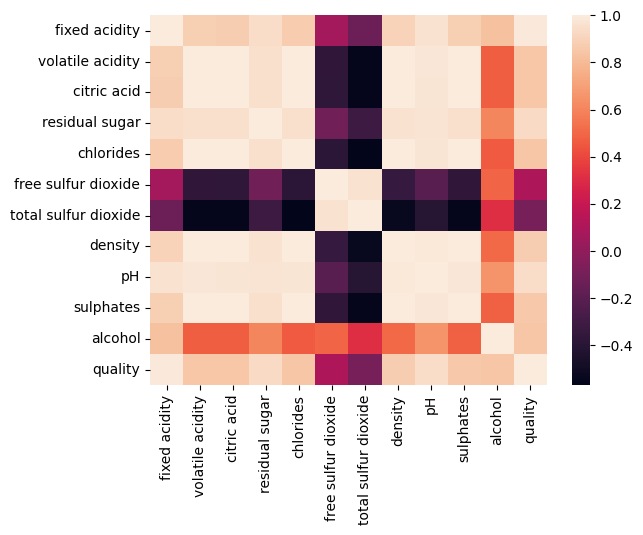

In [54]:
dryWines1 = dry_wines_df.describe().corr()
dryWines1

plt.figure
sns.heatmap(dryWines1)
plt.show()

### Off-Dry Wines

In [44]:
# # Off-Dry 
# OffDryWines  = {'fixed acdity': wine_red_white[(wine_red_white["fixed acidity"] >= 4.0) & (wine_red_white["fixed acidity"]<= 8)], 
#                 'volatile acidity': wine_red_white[(wine_red_white["volatile acidity"] >= 0.3) & (wine_red_white["volatile acidity"]<= 0.8)], 
#                'citric acid': wine_red_white[(wine_red_white["citric acid"] >= 0.1) & (wine_red_white["citric acid"]<= 0.5)], 
#                'residual sugar': wine_red_white[(wine_red_white["residual sugar"] >= 5) & (wine_red_white["residual sugar"]<= 30)],
#                'chlorides': wine_red_white[(wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"]< 0.1)], 
#                'free sulfur dioxide': wine_red_white[(wine_red_white["free sulfur dioxide"] >= 20) & (wine_red_white["free sulfur dioxide"]<= 60)],
#                'total sulfur dioxide': wine_red_white[(wine_red_white["total sulfur dioxide"] >= 70) & (wine_red_white["total sulfur dioxide"]<= 250)],
#                'density': wine_red_white[(wine_red_white["density"] >= 1.00) & (wine_red_white["density"]<= 1.07)],
#                'pH': wine_red_white[(wine_red_white["pH"] >= 3.2) & (wine_red_white["pH"]<= 3.5)],
#                'sulphates': wine_red_white[(wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"]<= 0.5)],
#                'alcohol': wine_red_white[(wine_red_white["alcohol"] >= 11.0) & (wine_red_white["alcohol"]<= 14.5)]}
# OffDryWines 


In [38]:
# Create individual masks for off-dry wines
mask_fixed_acidity = (wine_red_white["fixed acidity"] >= 4.0) & (wine_red_white["fixed acidity"] <= 8)
mask_volatile_acidity = (wine_red_white["volatile acidity"] >= 0.3) & (wine_red_white["volatile acidity"] <= 0.8)
mask_citric_acid = (wine_red_white["citric acid"] >= 0.1) & (wine_red_white["citric acid"] <= 0.5)
mask_residual_sugar = (wine_red_white["residual sugar"] >= 5) & (wine_red_white["residual sugar"] <= 30)
mask_chlorides = (wine_red_white["chlorides"] >= 0.01) & (wine_red_white["chlorides"] < 0.1)
mask_free_sulfur_dioxide = (wine_red_white["free sulfur dioxide"] >= 20) & (wine_red_white["free sulfur dioxide"] <= 60)
mask_total_sulfur_dioxide = (wine_red_white["total sulfur dioxide"] >= 70) & (wine_red_white["total sulfur dioxide"] <= 250)
mask_density = (wine_red_white["density"] >= 1.00) & (wine_red_white["density"] <= 1.07)
mask_pH = (wine_red_white["pH"] >= 3.2) & (wine_red_white["pH"] <= 3.5)
mask_sulphates = (wine_red_white["sulphates"] >= 0.1) & (wine_red_white["sulphates"] <= 0.5)
mask_alcohol = (wine_red_white["alcohol"] >= 11.0) & (wine_red_white["alcohol"] <= 14.5)

# Combine all masks into one
combined_mask = (mask_fixed_acidity &
                 mask_volatile_acidity &
                 mask_citric_acid &
                # mask_residual_sugar &
                 mask_chlorides &
                 mask_free_sulfur_dioxide &
                 mask_total_sulfur_dioxide &
                # mask_density &
                 mask_pH &
                 mask_sulphates &
                 mask_alcohol)

# Create the final DataFrame for off-dry wines
off_dry_wines_df = wine_red_white[combined_mask]

# Display the result
off_dry_wines_df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
26,white,6.2,0.39,0.24,4.80,0.037,45.0,138.0,0.99174,3.23,0.43,11.20,7
95,white,6.2,0.39,0.24,4.80,0.037,45.0,138.0,0.99174,3.23,0.43,11.20,7
351,white,5.1,0.35,0.26,6.80,0.034,36.0,120.0,0.99188,3.38,0.40,11.50,6
462,white,5.6,0.32,0.32,8.30,0.043,32.0,105.0,0.99266,3.24,0.47,11.20,6
523,white,6.2,0.30,0.31,1.60,0.035,40.0,106.0,0.98914,3.26,0.39,12.90,7
825,white,7.3,0.39,0.37,1.10,0.043,36.0,113.0,0.99100,3.39,0.48,12.70,8
856,white,5.3,0.30,0.16,4.20,0.029,37.0,100.0,0.99050,3.30,0.36,11.80,8
904,white,5.6,0.32,0.33,7.40,0.037,25.0,95.0,0.99268,3.25,0.49,11.10,6
923,white,6.0,0.44,0.26,3.10,0.053,57.0,128.0,0.98982,3.22,0.39,12.70,6
1079,white,6.1,0.33,0.30,3.00,0.036,30.0,124.0,0.98922,3.31,0.40,13.10,7


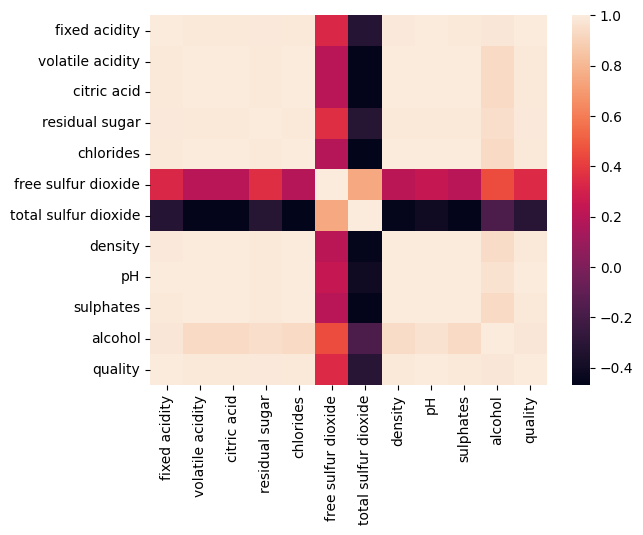

In [55]:
offdryWines1 = off_dry_wines_df.describe().corr()
offdryWines1

plt.figure
sns.heatmap(offdryWines1)
plt.show()

In [ ]:
!streamlit run Wine-Midterm.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://10.5.198.222:8501

